In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load the dataset
# Load the data from the CSV file into a pandas DataFrame.
data = pd.read_csv('/content/Fuel_cell_performance_data-Full.csv')

In [3]:
# Step 2: Select features and target variable
# Features: Columns that start with 'F' (F1 to F15)
# Target: 'Target2'
X = data[[col for col in data.columns if col.startswith('F')]]  # Features (F1 to F15)
y = data['Target2']

In [4]:
# Step 3: Split the data into training and test sets
# Use a 70-30 split for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 4: Initialize prediction models
# Define a dictionary of models to evaluate.
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

In [6]:
# Step 5: Train and evaluate each model
# Create an empty list to store evaluation results.
results = []

for name, model in models.items():
    print(f"Training {name}...")  # Display progress

    # Train the model using the training data.
    model.fit(X_train, y_train)

    # Make predictions on the test data.
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared score

    # Print intermediate results for better understanding.
    print(f"{name}:\n  RMSE = {rmse:.4f}\n  R^2 = {r2:.4f}\n")

    # Append results to the list
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R^2': r2
    })


Training Linear Regression...
Linear Regression:
  RMSE = 0.3258
  R^2 = 0.6356

Training Random Forest...
Random Forest:
  RMSE = 0.3341
  R^2 = 0.6169

Training Gradient Boosting...
Gradient Boosting:
  RMSE = 0.3368
  R^2 = 0.6106

Training Support Vector Machine...
Support Vector Machine:
  RMSE = 0.5437
  R^2 = -0.0145



In [7]:
# Step 6: Convert results into a DataFrame
# Organize results into a structured table for easier comparison.
results_df = pd.DataFrame(results)


In [8]:
# Step 7: Display and save results
# Print the final comparison table.
print("\nFinal Model Performance Comparison:")
print(results_df)



Final Model Performance Comparison:
                    Model      RMSE       R^2
0       Linear Regression  0.325827  0.635600
1           Random Forest  0.334079  0.616907
2       Gradient Boosting  0.336805  0.610630
3  Support Vector Machine  0.543665 -0.014537


In [10]:
# Save the results to a CSV file for documentation purposes.
results_df.to_csv('/content/Fuel_cell_performance_data-Full.csv', index=False)


In [11]:
# Final message to indicate completion.
print("\nModel evaluation completed! Results saved to 'prediction_results_Target2.csv'.")


Model evaluation completed! Results saved to 'prediction_results_Target2.csv'.


In [13]:
# Step 8: Perform Clustering
print("\nPerforming Clustering...")
# Use KMeans for clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_


Performing Clustering...


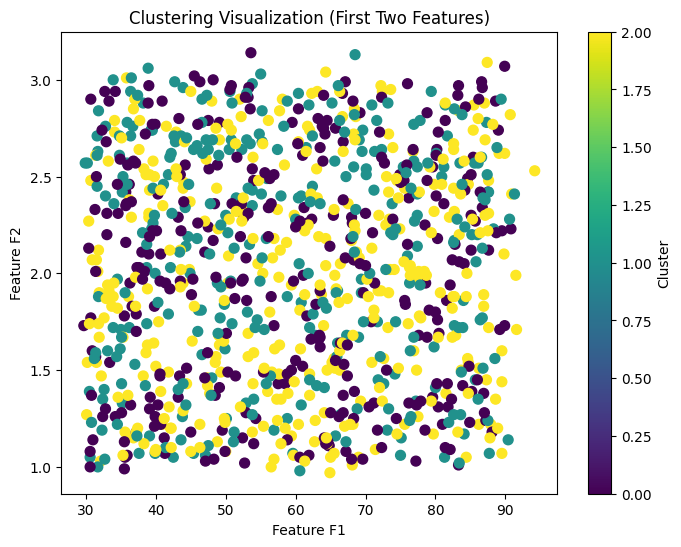

In [15]:
# Visualize clusters for the first two features
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title("Clustering Visualization (First Two Features)")
plt.xlabel("Feature F1")
plt.ylabel("Feature F2")
plt.colorbar(label="Cluster")
plt.show()


In [17]:
# Step 9: Perform Outlier Detection
print("\nPerforming Outlier Detection...")
# Use Isolation Forest for outlier detection
isolation_forest = IsolationForest(random_state=42, contamination=0.05)
outliers = isolation_forest.fit_predict(X)
data['Outlier'] = np.where(outliers == -1, 1, 0)  # Mark -1 as outliers

# Save the updated dataset with cluster and outlier information
data.to_csv('final result.csv', index=False)

print("\nClustering and Outlier Detection completed! Results saved.")


Performing Outlier Detection...

Clustering and Outlier Detection completed! Results saved.
